<a href="https://colab.research.google.com/github/kimdonggyufive/OpenReposit/blob/main/day2_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__

'2.7.0'

In [2]:
import numpy as np
import tensorflow as tf

np.random.seed(777)
tf.random.set_seed(777)

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
#Train 이미지가 뜻하는 값은 다음과 같다.
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [6]:
test_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [7]:
import matplotlib.pyplot as plt

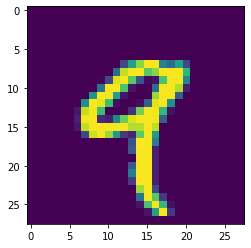

In [8]:
#4번째 이미지를 digit에 담는다
digit = train_images[4]

plt.imshow(digit)
plt.show()

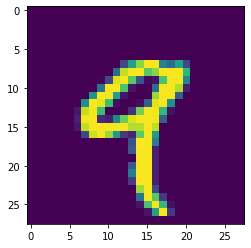

In [9]:
#4번째 이미지를 digit에 담는다
digit = train_images[4]

plt.imshow(digit)
plt.show()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model=Sequential()
#784 = 28*28
model.add(Dense(512, activation='relu', input_shape=(784,)))
#model.add(Dense(64, activation='relu'))
#결과 값은 다음과 같다.
#softmax는 분류를 하는 것이다.
model.add(Dense(10,activation='softmax'))

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
#학습 모델의 요약 정보를 본다.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [14]:
train_images=train_images.reshape(60000,28*28)


In [15]:
train_images.shape

(60000, 784)

In [16]:
train_images.dtype

dtype('uint8')

In [17]:
train_images=train_images.astype(np.float64)/255.

In [18]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
train_images=train_images.reshape(60000,28*28)
train_images=train_images.astype('float32')/255

In [20]:
test_images=test_images.reshape(10000,28*28)
test_images=test_images.astype('float32')/255

In [21]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [22]:
from tensorflow.keras.utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [23]:
test_labels[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
model.fit(train_images,train_labels, batch_size = 128, epochs = 5)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 1.2552 - accuracy: 0.6238
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.5473 - accuracy: 0.8354
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.4207 - accuracy: 0.8775
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3626 - accuracy: 0.8953
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3305 - accuracy: 0.9033


In [25]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print(f'loss={test_loss}, acc= {test_acc*100:.2f}%')

313/313 [==============================] - 2s 5ms/step - loss: 54.8209 - accuracy: 0.7811
loss=54.820926666259766, acc= 78.11%


In [26]:
import random
#1~9999개 중 임의의 수가 들어감
r=random.randrange(len(test_labels))
r_images=test_images[r:r+1]
r_labels=test_labels[r:r+1]
#x에는 예측하고 싶은 값을 준다.
r_predict=model.predict(r_images)
print('P',np.argmax(r_predict), r_predict)
print('L',np.argmax(r_labels), r_labels)


P 8 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
L 8 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


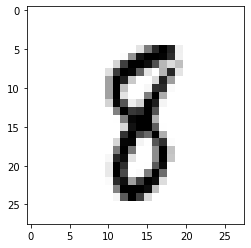

In [29]:
import matplotlib.pyplot as plt
#이미지를 다시보기
plt.imshow(r_images.reshape(28,28),cmap=plt.cm.binary)